In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
X = data.drop('target', axis=1)
y = data['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Without hyperparameter tuning**

In [41]:
clf1 = RandomForestClassifier(random_state=42)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print(f'Accuracy without hyperparameter tuning: {accuracy1}')

Accuracy without hyperparameter tuning: 0.8360655737704918


**Obb_score**


In [43]:
clf_oob = RandomForestClassifier(oob_score=True,random_state=42, bootstrap=True)
clf_oob.fit(X_train, y_train)
print(f'OOB Score: {clf_oob.oob_score_}')
y_pred_oob = clf_oob.predict(X_test)
accuracy_oob = accuracy_score(y_test, y_pred_oob)
print(f'Accuracy with OOB score: {accuracy_oob}')


OOB Score: 0.8347107438016529
Accuracy with OOB score: 0.8360655737704918


**Hyperparameter tuning**

In [31]:
parameters = { 
    'n_estimators': [25,50,75,100,150,200],
    'max_features': [0.2,0.4,0.6,0.8,1],
    'max_samples': [0.2,0.4,0.6,0.8,1],
    'max_depth':[2,6,8,10,None],
    
}
clf2 = RandomForestClassifier(bootstrap=True, random_state=42,)

In [32]:
clf_grid = GridSearchCV(estimator=clf2, param_grid=parameters, cv=5, n_jobs=-1, verbose=2)
clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [2, 6, ...], 'max_features': [0.2, 0.4, ...], 'max_samples': [0.2, 0.4, ...], 'n_estimators': [25, 50, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,75


In [29]:
clf_grid.best_score_

np.float64(0.8594387755102041)

In [15]:
y_pred2 = clf_grid.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy with hyperparameter tuning: {accuracy2}')

Accuracy with hyperparameter tuning: 0.8688524590163934



Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



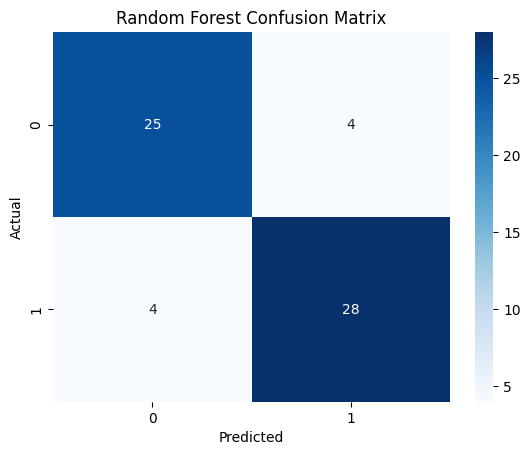

In [19]:

print("\nClassification Report:\n", classification_report(y_test, y_pred2))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [24]:
features = pd.DataFrame({
    'feature': X.columns,
    'importance': clf_grid.best_estimator_.feature_importances_
}).sort_values(by='importance', ascending=False)

In [25]:
features

,feature,importance
9,oldpeak,0.119373
0,age,0.101982
3,trestbps,0.100788
2,cp,0.098380
7,thalach,0.094711
4,chol,0.090088
11,ca,0.089031
12,thal,0.081114
10,slope,0.070309
8,exang,0.056974


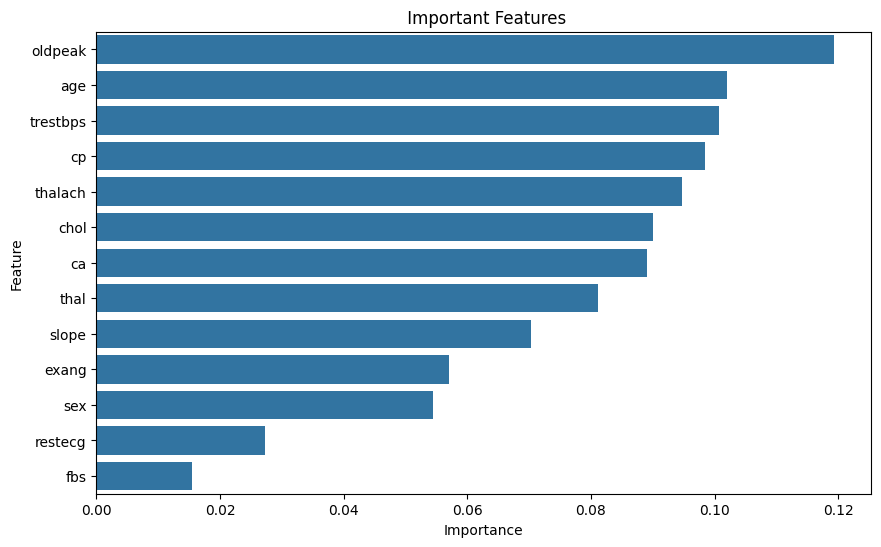

In [ ]:

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=features)
plt.title(" Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()